## Import Libraries

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
## import the data

In [42]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

5

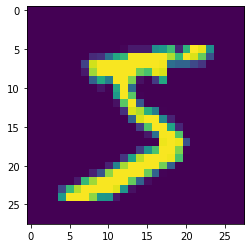

In [44]:
# visualization
plt.imshow(x_train[0])  # image
y_train[0]              # label

In [45]:
## flatten images into one-dimensional vector
num_pixels=x_train.shape[1]*x_train.shape[2]   #(28*28) find size of one-dimensional vector
x_train=x_train.reshape(x_train.shape[0],num_pixels).astype('float32') # flatten training images
x_test=x_test.reshape(x_test.shape[0],num_pixels).astype('float32') # flatten test images


## normalize inputs from 0-255 to 0-1
x_train=x_train/255
x_test=x_test/255

In [49]:
## label ==> one hot encode 
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

num_classes=y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [56]:
# define classification model
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam

def classification_model():
    ## create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    ## compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


model=classification_model()    # build the model
model.summary()

## Train and Test the Network


In [57]:
## fit the model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=2)

## evaluate the model
scores=model.evaluate(x_test,y_test,verbose=0)

Epoch 1/10
1875/1875 - 18s - loss: 0.1995 - accuracy: 0.9394 - val_loss: 0.1085 - val_accuracy: 0.9663
Epoch 2/10
1875/1875 - 18s - loss: 0.0857 - accuracy: 0.9733 - val_loss: 0.0937 - val_accuracy: 0.9723
Epoch 3/10
1875/1875 - 24s - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0774 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 - 18s - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.0793 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 - 18s - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0894 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 - 24s - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0872 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 - 22s - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0768 - val_accuracy: 0.9825
Epoch 8/10
1875/1875 - 23s - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0923 - val_accuracy: 0.9778
Epoch 9/10
1875/1875 - 21s - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.1026 - val_accuracy: 0.9782
Epoch 10/10
1875/1875 - 18s - loss: 0.0201 - accuracy: 0.9937 - val_loss:

In [58]:
print('Accuracy: {}% \n Error: {}'.format(scores[1],1-scores[1]))        

Accuracy: 0.9789000153541565% 
 Error: 0.021099984645843506


In [ ]:
## Save Model weights

In [60]:
model.save('hand_written_digits_classification_model_v1.h5')

In [61]:
## Load Saved Model

In [62]:
from tensorflow.keras.models import load_model
pretrained_model = load_model('hand_written_digits_classification_model_v1.h5')